# Examining $E_d$ vs. depth

In [1]:
# imports
import numpy as np
from matplotlib import pyplot as plt

from ocpy.hydrolight import loisel23

# Load up Loisel

In [3]:
ds = loisel23.load_ds(1,0, profile=True)

In [4]:
ds

<xarray.Dataset> Size: 727MB
Dimensions:    (z: 61, Lambda: 81, IOP_Scenario: 3320)
Coordinates:
  * z          (z) float32 244B -1.0 0.0 0.1 0.2 0.3 ... 47.0 48.0 49.0 50.0
  * Lambda     (Lambda) float32 324B 350.0 355.0 360.0 ... 740.0 745.0 750.0
Dimensions without coordinates: IOP_Scenario
Data variables: (12/18)
    Rrs        (IOP_Scenario, Lambda) float32 1MB 0.01084 0.01084 ... 2.8e-05
    Ed_0+      (IOP_Scenario, Lambda) float32 1MB 0.7753 0.7314 ... 1.237 1.222
    Lw         (IOP_Scenario, Lambda) float32 1MB 0.0084 0.007927 ... 3.421e-05
    Lu_0+      (IOP_Scenario, Lambda) float32 1MB 0.04003 0.03817 ... 0.0624
    zeu_PAR    (IOP_Scenario) float32 13kB 999.0 999.0 999.0 ... 999.0 999.0
    z1_PAR     (IOP_Scenario) float32 13kB 15.18 15.27 13.34 ... 11.02 10.3
    ...         ...
    Eu_z       (z, IOP_Scenario, Lambda) float32 66MB 0.05279 0.04953 ... 0.0
    KEu_z      (z, IOP_Scenario, Lambda) float32 66MB nan nan ... 2.888 2.908
    KEd_z      (z, IOP_Scenario, Lambda) float32 66MB nan nan ... 2.888 2.909
    KLu_z      (z, IOP_Scenario, Lambda) float32 66MB nan nan ... 2.888 2.909
    md_z       (z, IOP_Scenario, Lambda) float32 66MB 0.7305 0.7361 ... 0.9806
    mu_z       (z, IOP_Scenario, Lambda) float32 66MB 0.3924 0.3959 ... 0.4099

# Pick an example

In [5]:
wave = ds.Lambda.data
wave.shape

(81,)

In [6]:
idx = 170
Edz = ds.Ed_z.data[:,idx,:]
Edz.shape

(61, 81)

# Plot

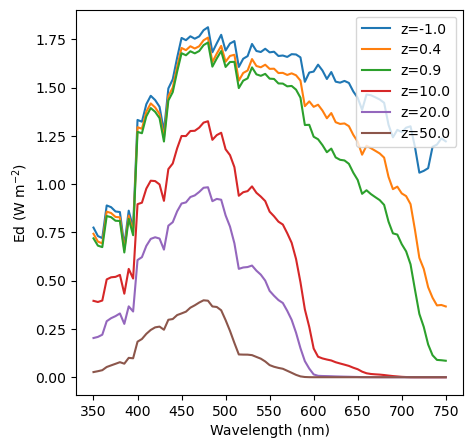

In [11]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
#
for idepth in [0,5,10,20,30,60]:
    ax.plot(wave, Edz[idepth], label=f'z={ds.z.data[idepth]:0.1f}')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'Ed (W m$^{-2}$)')
#
ax.legend()
#ax.set_yscale('log')
#
plt.savefig('Ed_vs_depth.png', dpi=300)
plt.show()

# PAR

## Plot $E_d$

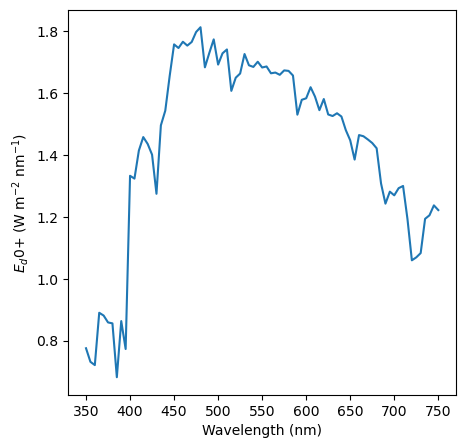

In [48]:
#Ed0 = ds['Ed_0+'][0]
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
#
ax.plot(wave, Ed)
#ax.plot(wave, Ed0)
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'$E_d$0+ (W m$^{-2}$ nm$^{-1}$)')
#
#ax.legend()
#ax.set_yscale('log')
#
#plt.savefig('Kd_components.png', dpi=300)
plt.show()

## PAR

## $PAR \equiv \int_{400nm}^{700nm} \frac{E_0 \lambda}{hc} \, d\lambda$

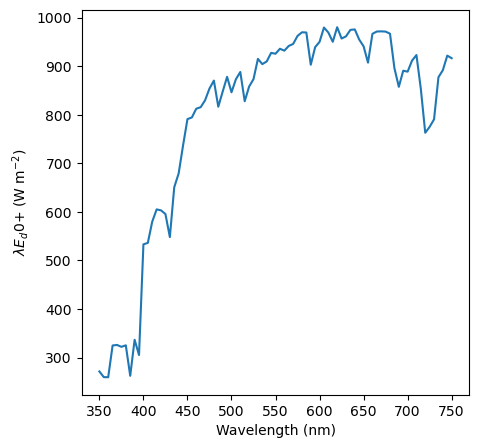

In [49]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
#
ax.plot(wave, Ed*wave)
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'$\lambda E_d$0+ (W m$^{-2}$)')
#
#ax.legend()
#ax.set_yscale('log')
#
#plt.savefig('Kd_components.png', dpi=300)
plt.show()

## Cumulative

In [50]:
good_wv = (wave >= 400.) & (wave <= 700)
PAR_cum = np.cumsum((Ed*wave)[good_wv])

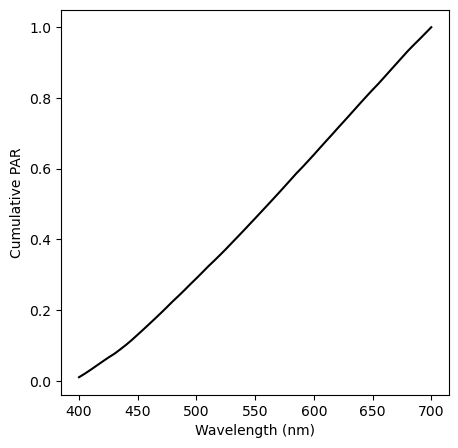

In [54]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
#
ax.plot(wave[good_wv], PAR_cum/PAR_cum[-1], 'k')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Cumulative PAR')
#
#ax.legend()
#ax.set_yscale('log')
#
plt.savefig('PAR_cumulative.png', dpi=300)
plt.show()

# Eutrophic water

In [55]:
idx = 2773
acdom = ds.ag[idx]
aph = ds.aph[idx]
aw = ds.a[idx] - ds.anw[idx]
atot = ds.a[idx]
#
bb = ds.bb[idx]
bbp = ds.bbnw[idx]
bbph = ds.bbph[idx]
bbw = ds.bb[idx] - ds.bbnw[idx]
# E
Ed = ds['Ed_0+'][idx]

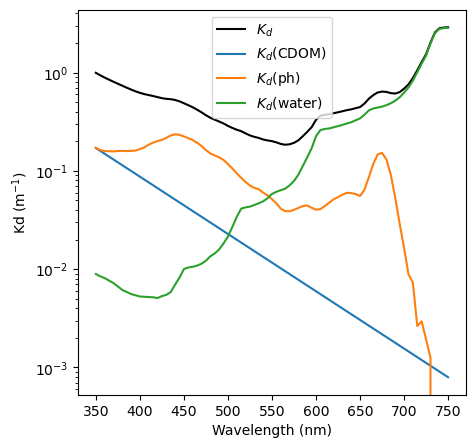

In [57]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
#
ax.plot(wave, calc_Kd(atot, bb), label=r'$K_d$', color='k')
ax.plot(wave, calc_Kd(acdom, 0.), label=r'$K_d$(CDOM)')
ax.plot(wave, calc_Kd(aph, bbph), label=r'$K_d$(ph)')
ax.plot(wave, calc_Kd(aw, bbw), label=r'$K_d$(water)')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'Kd (m$^{-1}$)')
#
ax.legend()
ax.set_yscale('log')
#
plt.savefig('Kd_eutrophic.png', dpi=300)
plt.show()